In [12]:
from collections import namedtuple
import matplotlib.pyplot as plt
from sympy.ntheory import sqrt_mod
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import random
from scipy.stats import chisquare,pearsonr,spearmanr
from scipy.spatial import Voronoi, voronoi_plot_2d
from decimal import Decimal
import secrets

In [2]:

def binaryToDecimal(binary): 
      
    decimal, i, n = 0, 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return decimal 

def isPrime(n):
    for i in range(2,int(n**0.5)+1):
        if n%i==0:
            return False
    return True


def valid(P):
    # print((P.y**2)%p)
    # print((P.x**3 + a*P.x + b) % p)                  
    if P == O:
        return True
    else:
        return (
            (P.y**2 - (P.x**3 + a*P.x + b)) % p == 0 and
            0 <= P.x < p and 0 <= P.y < p)

def inv_mod_p(x):
    if x % p == 0:
        raise ZeroDivisionError("Impossible inverse")
    return pow(x, p-2, p)

def ec_inv(P):
    if P == O:
        return P
    return Point(P.x, (-P.y)%p)

def ec_add(P, Q):
    if not (valid(P) and valid(Q)):
        raise ValueError("Invalid inputs")
    if P == O:
        result = Q
    elif Q == O:
        result = P
    elif Q == ec_inv(P):
        result = O
    else:
        if P == Q:
            dydx = ((3 * P.x**2 + a) * inv_mod_p(2 * P.y)) % p
        else:
            dydx = ((Q.y - P.y) * inv_mod_p(Q.x - P.x)) % p
        x = (dydx**2 - P.x - Q.x) % p
        y = (dydx * (P.x - x) - P.y) % p
        result = Point(x, y)
    assert valid(result)
    return result

def test_singularity():
    if (4*a**3+27*b**2)%p != 0:
        print("the curve is non-singular")
    else:
        print("the curve is singular and should not be used")

def plot_curve(p,a,b):
    x= []
    y = []
    y_neg = []
    arr = np.linspace(-1.21,5,100)
    for i in arr:
        j = Decimal(i**3 + a*i + b).sqrt()
#         print(j)
        x.append(i)
        y.append(j)
        y_neg.append(-1*j)
    plt.plot(x,y)
    plt.plot(x,y_neg)
    plt.figure(figsize=(50,50))
    plt.show()

def curve_under_field(p,a,b):
    for i in range(p):
        j = i**3 + a*i + b
#         j_final = sqrt_mod(j,p,True)
        j_final = prime_mod_sqrt(j,p)
#         print(j_final)
        if j_final==None:
            continue
        else:
            if type(j_final)==list and len(j_final) > 1:
                x_field.append(i)
                x_field.append(i)
                if j_final[0]<p:
                    x_field.append(i)
                    y_field.append(j_final[0])
                if j_final[1]<p:
                    x_field.append(i)
                    y_field.append(j_final[1])
#                 plt.scatter(i,j_final[0])
#                 plt.scatter(i,j_final[1])
# plt.show()

def find_order(P):
    cyclic_group = []
    order = 0
    P_inv = ec_inv(P)
    temp = P
    while (temp.x!=P_inv.x) or (temp.y!=P_inv.y):
        order = order+1
        cyclic_group.append(temp)
        temp = ec_add(temp , P)
    cyclic_group.append(temp)
    return order+2,cyclic_group

def get_q(P,d):
    count = 0
    temp = P
    while count<d:
        count = count+1
        temp = ec_add(temp,P)
    return temp

def get_q_fast(P,d):
    result = P
    while d>0:
        if(d&1):
            result = ec_add(result,P)
        d = d>>1
        P = ec_add(P,P)
    return result

def generate_binary(n):
    bin_arr = []
    bin_str = [0] * n

    for i in range(0, int(math.pow(2,n))):
        bin_arr.append("".join(map(str,bin_str)))
        bin_str[0] += 1
    # Iterate through entire array if there carrying
        for j in range(0,len(bin_str) - 1):
            if bin_str[j] == 2:

                bin_str[j] = 0
                bin_str[j+1] += 1
                continue
            else:
                break
    return bin_arr

def prime_mod_sqrt(a, p):

    a %= p

    # Simple case
    if a == 0:
        return [0]
    if p == 2:
        return [a]

    # Check solution existence on odd prime
    if legendre_symbol(a, p) != 1:
        return []

    # Simple case
    if p % 4 == 3:
        x = pow(a, (p + 1)//4, p)
        return [x, p-x]

    # Factor p-1 on the form q * 2^s (with Q odd)
    q, s = p - 1, 0
    while q % 2 == 0:
        s += 1
        q //= 2

    # Select a z which is a quadratic non resudue modulo p
    z = 1
    while legendre_symbol(z, p) != -1:
        z += 1
    c = pow(z, q, p)

    # Search for a solution
    x = pow(a, (q + 1)//2, p)
    t = pow(a, q, p)
    m = s
    while t != 1:
        # Find the lowest i such that t^(2^i) = 1
        i, e = 0, 2
        for i in range(1, m):
            if pow(t, e, p) == 1:
                break
            e *= 2

        # Update next value to iterate
        b = pow(c, 2**(m - i - 1), p)
        x = (x * b) % p
        t = (t * b * b) % p
        c = (b * b) % p
        m = i

    return [x, p-x]

def legendre_symbol(a, p):
    ls = pow(a, (p - 1)//2, p)
    if ls == p - 1:
        return -1
    return ls


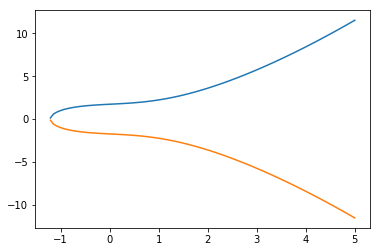

<Figure size 3600x3600 with 0 Axes>

In [3]:
Point = namedtuple("Point", "x y")
O = 'Origin'
a = 1
b = 3
p = 15733
plot_curve(p,a,b)
x_field = []
y_field = []
curve_under_field(p,a,b)
P = Point(x=0,y=0)

In [4]:
#searching for P with prime order q
prime_order = 0
prime_order_point = Point(0,0)
l = len(x_field)
for i in range(l):
    P = Point(x_field[i],y_field[i])
    order,cyclic_group = find_order(P)
    if isPrime(order) and order>5000:
        prime_order = order
        prime_order_point = P
        break
if prime_order!=0:
    print(len(cyclic_group))
print(prime_order,prime_order_point)

5280
5281 Point(x=0, y=4124)


In [13]:
k = math.floor(math.log(prime_order,2))
print(k)
val = input("Enter a "+str(k)+" bit string")
num = binaryToDecimal(int(val))
print("The decimal value of the string is ",num)
if int(num) < int(prime_order):
    temp = get_q_fast(P,num)
    print("The point generated for the above decimal value is ",temp)
else:
    raise ValueError("Invalid binary string entered")

12
Enter a 12 bit string101010101010
The decimal value of the string is  2730
The point generated for the above decimal value is  Point(x=14883, y=1691)


In [16]:
f = open("test.txt","w+") 

binary_array = generate_binary(k)
random_strings = []
count = 0
while count<5000:
    index = secrets.randbelow(2**12-1)
    if index<prime_order:
        count = count+1
        random_strings.append(int(binary_array[secrets.randbelow(2**12-1)]))
    
random_points_x = []
random_points_y = []
random_numbers = []
for i in range(5000):
    d = binaryToDecimal(random_strings[i])
    random_numbers.append(d)
    q = get_q_fast(P,d)
    random_points_x.append(q.x)
    random_points_y.append(q.y)
    f.write(str(q)+"\n")
print(count)

5000


In [17]:
random_numbers = np.array(random_numbers)
random_points_x = np.array(random_points_x)
random_points_y = np.array(random_points_y)

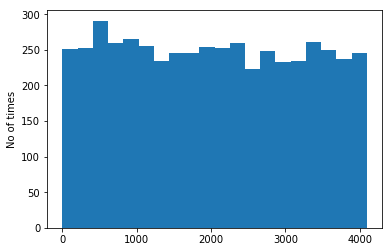

Power_divergenceResult(statistic=1012.0804248861913, pvalue=0.5813559474400307)


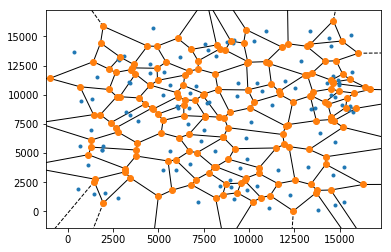

In [18]:
#testing for uniform randomness
#histogram analysis
# plt.hist(random_numbers, bins=1)
# plt.ylabel('No of times')
# plt.show()
plt.hist(random_numbers, bins=20)
plt.ylabel('No of times')
plt.show()

#chi square test for independence of variables
dict_numbers = {}
for i in range(len(random_numbers)):
    dict_numbers[random_numbers[i]] = dict_numbers.get(random_numbers[i],0)+1
frequency_array = []
for i in range((2**10)-1):
    frequency_array.append(dict_numbers.get(i,0))
frequency_array = np.asarray(frequency_array)
print(chisquare(frequency_array))


#Voroi plots
voronoi_points = []
for i in range(100):
    voronoi_points.append([random_points_x[i],random_points_y[i]])
voronoi_points = np.array(voronoi_points)
vor = Voronoi(voronoi_points)
voronoi_plot_2d(vor)
plt.show()
# print(voroi_points)

(-0.03799888955683583, 0.22992150243937173)
(-0.04553393582853158, 0.15019164350449216)
SpearmanrResult(correlation=-0.03715450915450916, pvalue=0.2404492833115189)
SpearmanrResult(correlation=-0.0459627194099235, pvalue=0.14638526205868402)


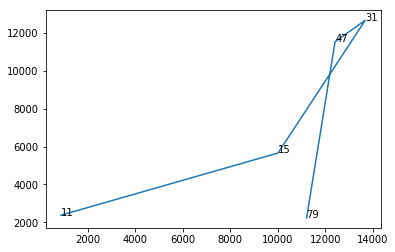

In [21]:
#correlation testing
labels = [11,15,31,47,79]
values = []
labels2 = []
for x in range(1000):
    labels2.append(x)
for x in range(1000):
    values.append(x)
values = np.array(values)
points_x = []
points_y = []
points2_x = []
points2_y = []
corr_x = []
corr_y = []
for x in values:
    temp = get_q(P,x)
    corr_x.append(temp.x)
    corr_y.append(temp.y)
for x in labels:
    temp = get_q(P,x)
    points_x.append(temp.x)
    points_y.append(temp.y)
#     print(temp.x,temp.y)
for x in labels2:
    points2_x.append(corr_x[x])
    points2_y.append(corr_y[x])
fig, ax = plt.subplots()
ax.plot(points_x,points_y)
for i, txt in enumerate(labels):
    ax.annotate(txt, (points_x[i],points_y[i]))

print(pearsonr(values,np.array(corr_x)))
print(pearsonr(values,np.array(corr_y)))
print(spearmanr(values,np.array(corr_x)))
print(spearmanr(values,np.array(corr_y)))

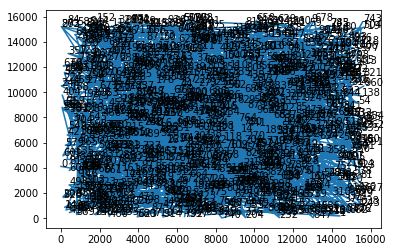

In [22]:
# for i in range(1,100):
#     for j in range(1,100):
#         if (pearsonr(np.array(list(binary_array[i])).astype(np.integer),np.array(list(binary_array[j])).astype(np.integer))[0])>0.5:
#             print(i,j)
            
# print(pearsonr(np.array([1,2,3,4,5,6,7,8]),np.array([1,4,9,16,25,36,49,64])))
# spearmanr(np.array(list(binary_array[10])).astype(np.integer),np.array(list(binary_array[11])).astype(np.integer))
fig, ax = plt.subplots()
ax.plot(points2_x,points2_y)
for i, txt in enumerate(labels2):
    ax.annotate(txt, (points2_x[i],points2_y[i]))